# Linear Regression

### What's regresssion,what's its use:


(1)It is to find the relationship among the variables(between inputs and the outputs).
(2)It is used to predict the response using new set of data knowing how old data performed.
(3)Inputs(predictors) being independent variables and output(responses) being dependent variable.


Linear regression is most commmonly used type of regression where it's general equation is y=mx+b where m and b being the parameters that we control and Xs are the set of inputs and Ys are the set of oututs.
If there are multiple inputs then it'll be easier to represent them as X={x1,x2,x3,...xn} where n are number of predictors given (inputs given) and the multiple outputs as Y={a0 + a1x1 + a2x2 + a3x3+...anxn + E) where E is the random error.

We can calculate the estimators or the weights for a model by linear regression.For a model,f(x)=a0 + a1x1+ a2x2+ ...anxn,
a0,a1,a2,...an are the estimators or weights for respective inputs.
f(x) is called as the estimator response while this is expected to be better if closer to the y.
The estimated response f(xi) for observations where i=1,2,3..n has to be as close as possible to the yi so the quantity (yi-f(xi)) is calcualted which is called as residual.
We are interested to find out the SSR=(sum of squares of residuals) cause if we minimise the SSR,we are more likely to get the best weights for the model.

The coefficient of determination (R^2) has to be 1 to get SSR=0 and so that the line can perfectly fit the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns


In [2]:
boston_dataset = load_boston()

In [3]:
boston_data = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
#boston_datasets.feature_names has the all the features

In [4]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [6]:
boston_data.shape

(506, 13)

In [7]:
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [8]:
boston_data['MEDV']=boston_dataset.target

In [9]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM = | ZN = | INDUS = | CHAS = | NOX = | RM = | AGE = | DIS = | RAD = | TAX = | PTRATIO = | B = | LSTAT = | MEDV = |

In [10]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
boston_data.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [12]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,8)})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


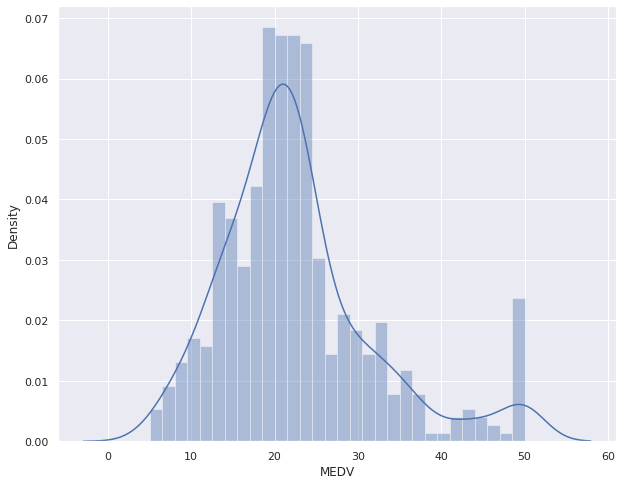

In [13]:
#plotting distribution of target values
sns.distplot(boston_data['MEDV'],
            bins=30,
           
           )
plt.show()

In [14]:
boston_data[['AGE','CRIM','TAX']].describe().round(2)

,AGE,CRIM,TAX
count,506.00,506.00,506.00
mean,68.57,3.61,408.24
std,28.15,8.60,168.54
min,2.90,0.01,187.00
25%,45.02,0.08,279.00
50%,77.50,0.26,330.00
75%,94.07,3.68,666.00
max,100.00,88.98,711.00


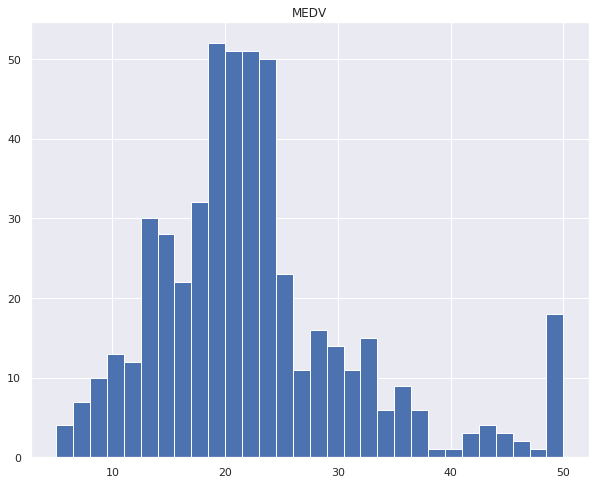

In [15]:
#
boston_data.hist(column='MEDV',bins=30)
plt.show()

"'It looks like the distribution of number of average rooms is normal distributed cause mean and median are so close to one another"

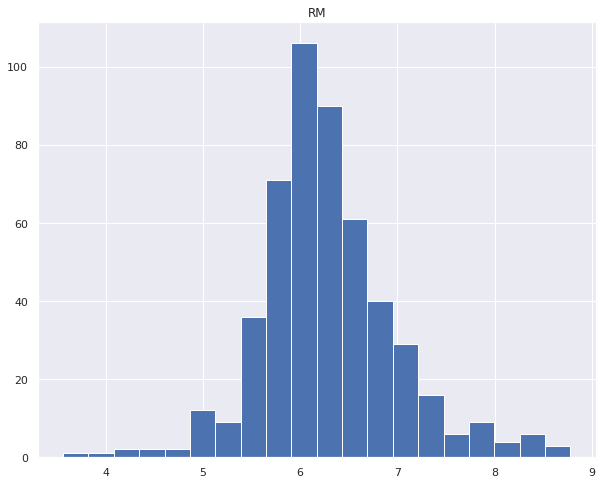

In [16]:
boston_data.hist(column='RM',bins=20)
''''It looks like the distribution of number of average rooms is normal distributed cause mean and median are so close to one another'''


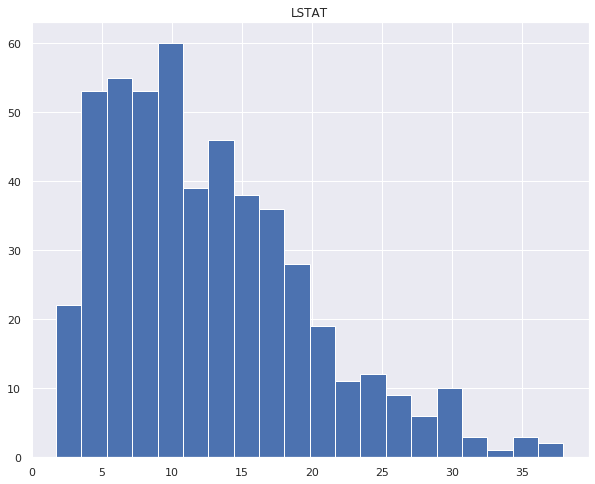

In [17]:
boston_data.hist(column='LSTAT',bins=20)
plt.show()

# Correlation Matrix

#### Correlation matrix is useful to find the linear relationship between the variables 

In [18]:
correlation_matrix = boston_data.corr().round(2)

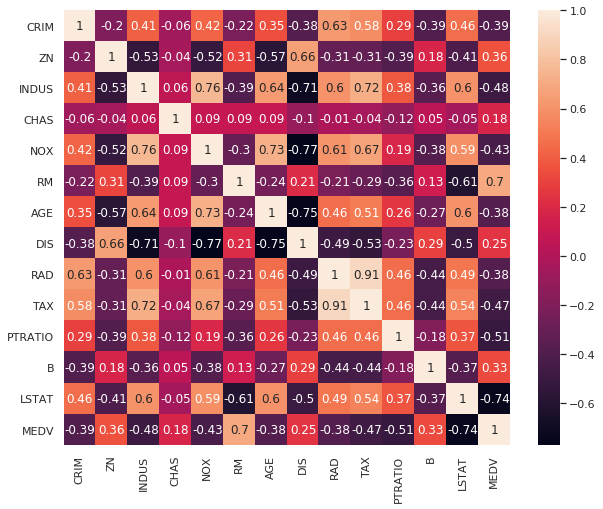

In [19]:
sns.heatmap(data=correlation_matrix,annot=True)

###### The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation. 

### So,value near 1 indicates strongest positive correlation between variables while value near to -1 indicates strongest negative correlation between variables.

### It is important to find and select those feature variables which are highly correlated with the target variable for a well fitted linear model.